In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torchvision

# Hyperparameters
batch_size = 64
latent_dim = 100
num_epochs = 50
learning_rate = 0.0002
device = 'cuda:1'

# Load and prepare the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4524448.22it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 123057.48it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 953393.99it/s] 


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3132280.30it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
# Define the Convolutional Generator model
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.ConvTranspose2d(latent_dim, 128, kernel_size=7, stride=1, padding=0, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 1, kernel_size=4, stride=2, padding=1, bias=False),
            nn.Tanh()
        )

    def forward(self, x):
        x = x.view(x.size(0), latent_dim, 1, 1)
        x = self.model(x)
        return x

# Define the Convolutional Discriminator model
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=4, stride=2, padding=1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Flatten(),
            nn.Linear(128 * 7 * 7, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.model(x)
        return x

[Epoch 1/50] [D loss: 0.2626] [G loss: 2.4108]


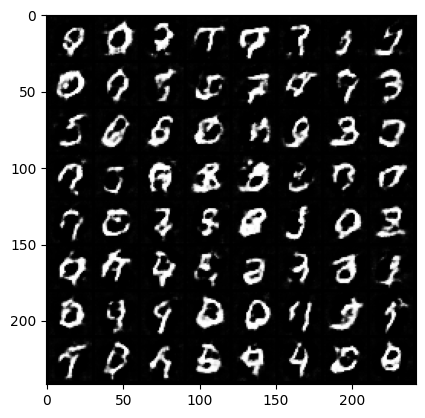

[Epoch 2/50] [D loss: 0.2816] [G loss: 1.8011]


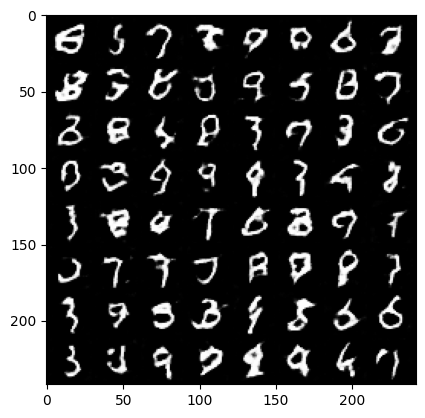

[Epoch 3/50] [D loss: 0.2736] [G loss: 1.8961]


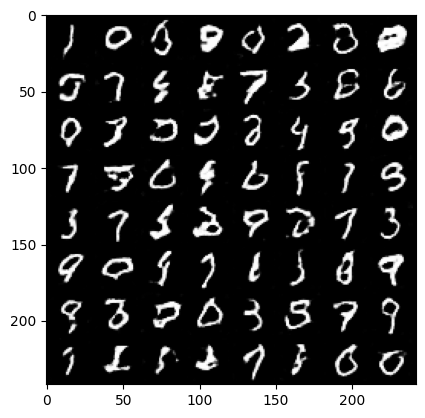

[Epoch 4/50] [D loss: 0.2784] [G loss: 1.9261]


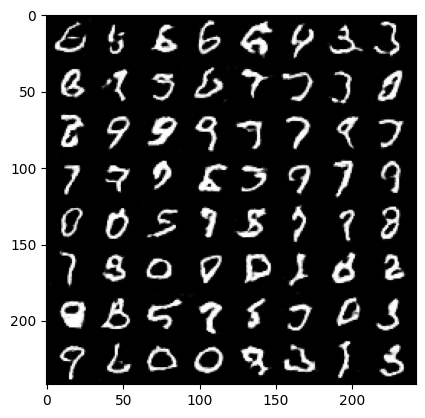

[Epoch 5/50] [D loss: 0.2810] [G loss: 1.9642]


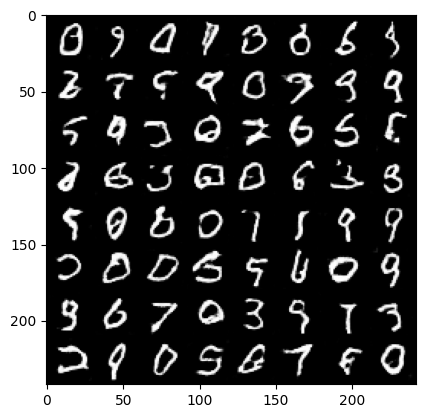

[Epoch 6/50] [D loss: 0.2864] [G loss: 1.9775]


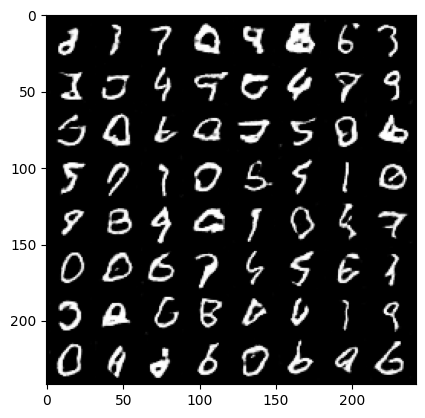

[Epoch 7/50] [D loss: 0.2825] [G loss: 2.0229]


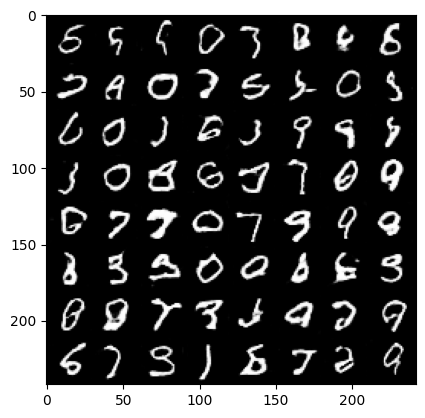

[Epoch 8/50] [D loss: 0.2771] [G loss: 2.0704]


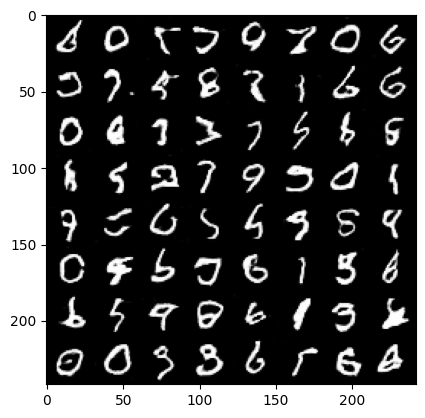

[Epoch 9/50] [D loss: 0.2796] [G loss: 2.1045]


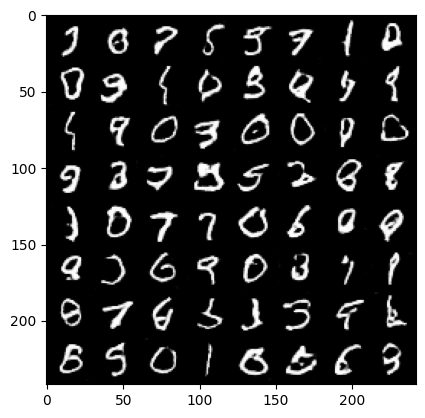

[Epoch 10/50] [D loss: 0.2723] [G loss: 2.1507]


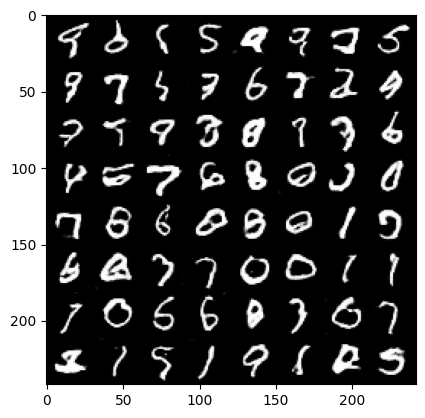

[Epoch 11/50] [D loss: 0.2699] [G loss: 2.1830]


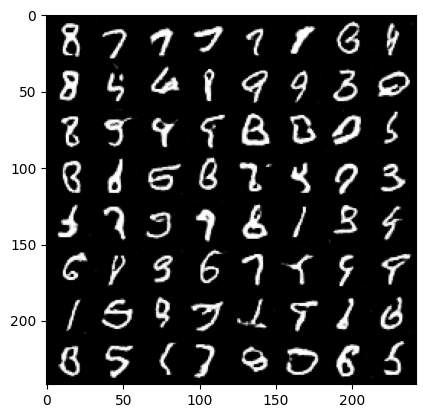

[Epoch 12/50] [D loss: 0.2629] [G loss: 2.2099]


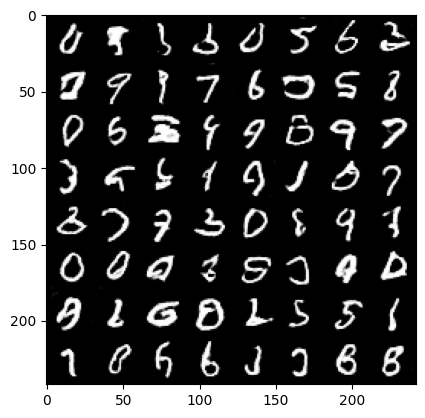

[Epoch 13/50] [D loss: 0.2549] [G loss: 2.2792]


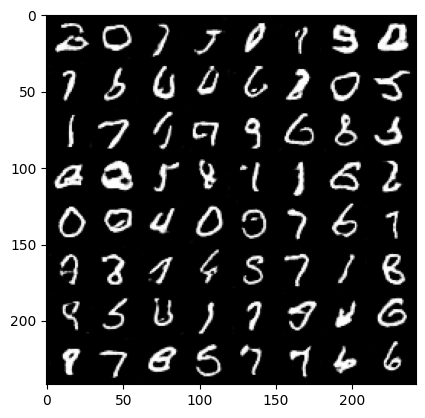

[Epoch 14/50] [D loss: 0.2529] [G loss: 2.3102]


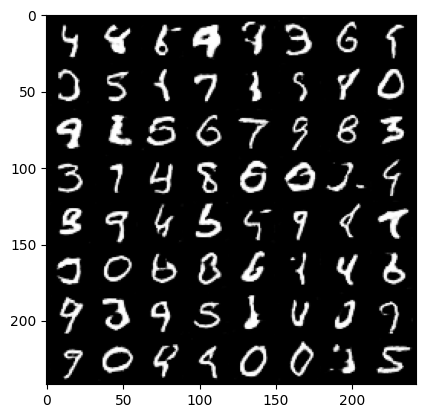

[Epoch 15/50] [D loss: 0.2494] [G loss: 2.3445]


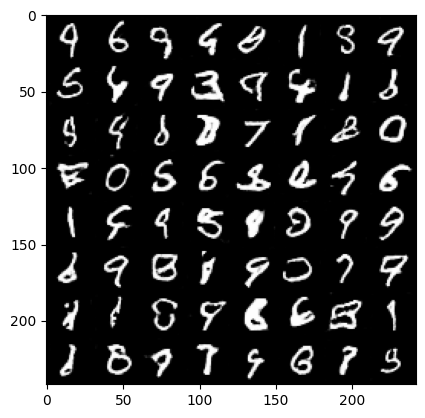

[Epoch 16/50] [D loss: 0.2444] [G loss: 2.3855]


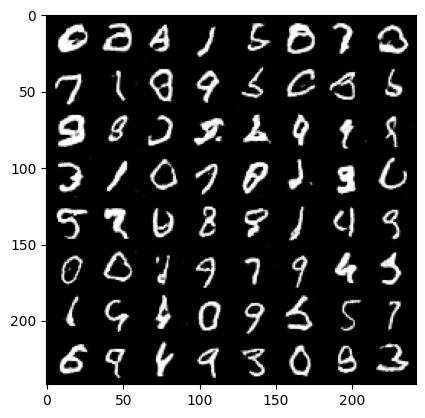

[Epoch 17/50] [D loss: 0.2383] [G loss: 2.4213]


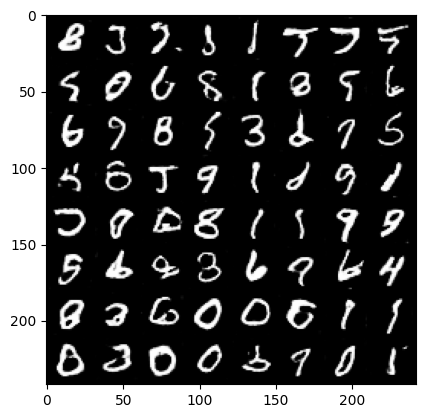

[Epoch 18/50] [D loss: 0.2405] [G loss: 2.4348]


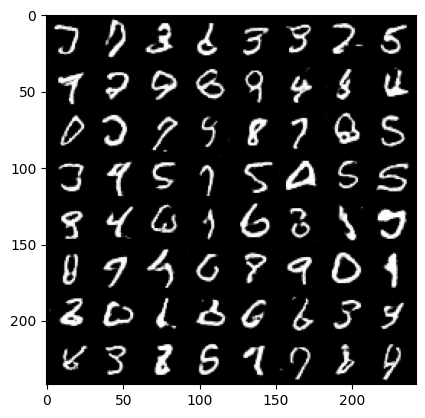

[Epoch 19/50] [D loss: 0.2314] [G loss: 2.4885]


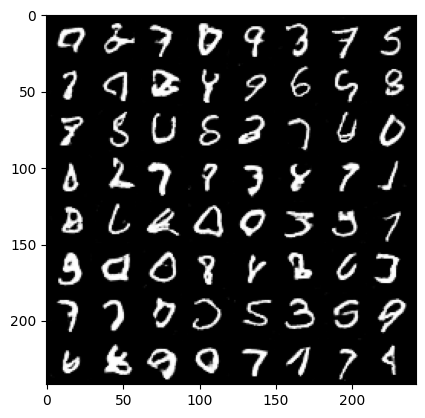

[Epoch 20/50] [D loss: 0.2303] [G loss: 2.5315]


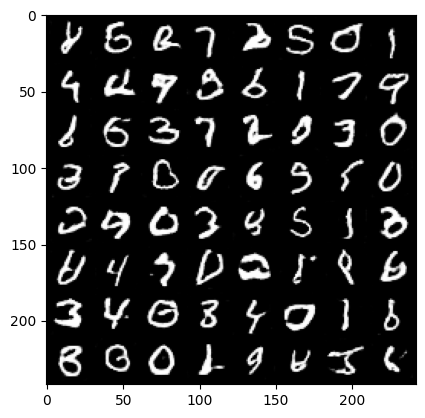

[Epoch 21/50] [D loss: 0.2268] [G loss: 2.5582]


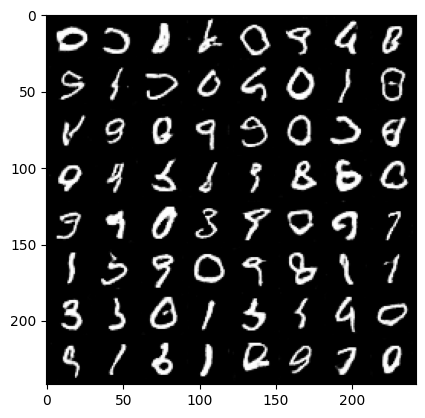

[Epoch 22/50] [D loss: 0.2231] [G loss: 2.5834]


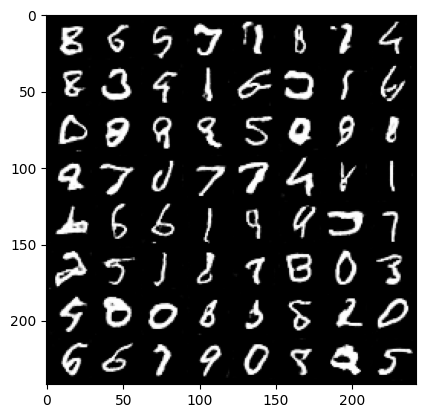

[Epoch 23/50] [D loss: 0.2271] [G loss: 2.5913]


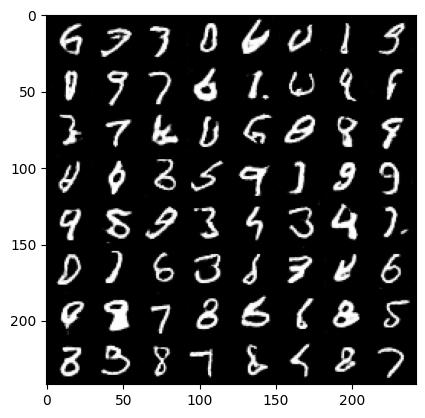

[Epoch 24/50] [D loss: 0.2173] [G loss: 2.6433]


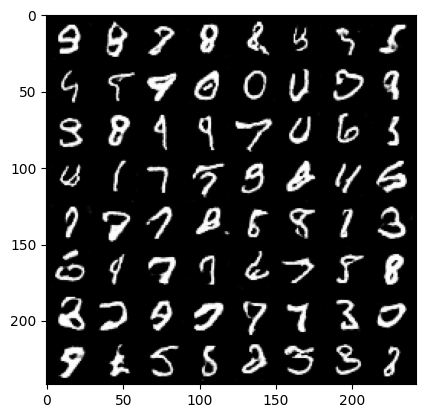

[Epoch 25/50] [D loss: 0.2161] [G loss: 2.6689]


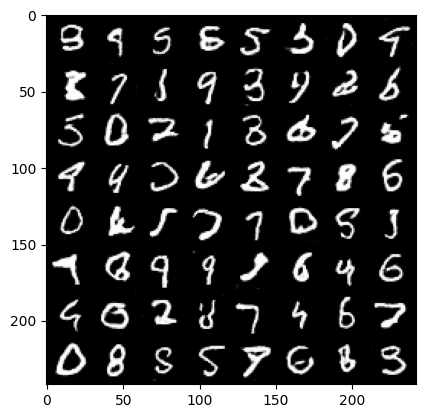

[Epoch 26/50] [D loss: 0.2151] [G loss: 2.6936]


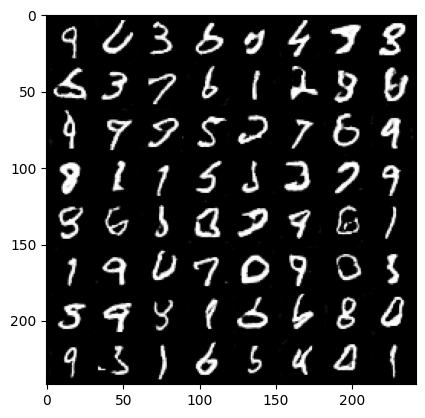

[Epoch 27/50] [D loss: 0.2114] [G loss: 2.7227]


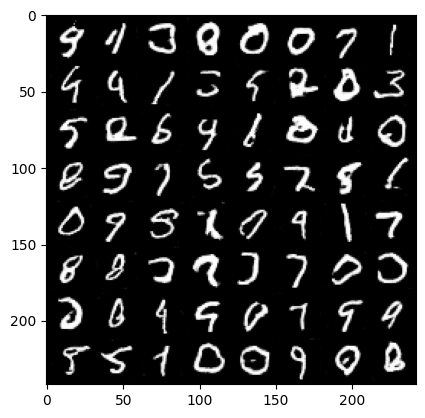

[Epoch 28/50] [D loss: 0.2090] [G loss: 2.7495]


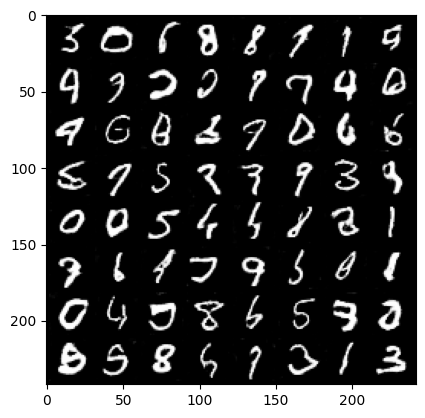

[Epoch 29/50] [D loss: 0.2068] [G loss: 2.7666]


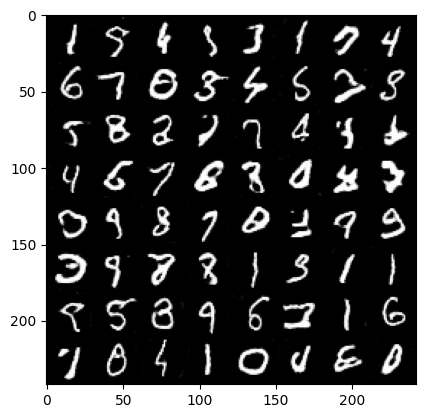

[Epoch 30/50] [D loss: 0.2048] [G loss: 2.8051]


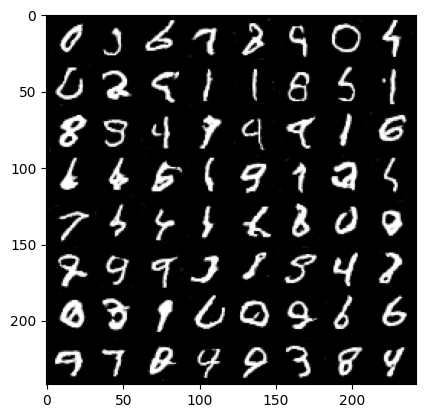

[Epoch 31/50] [D loss: 0.2051] [G loss: 2.8090]


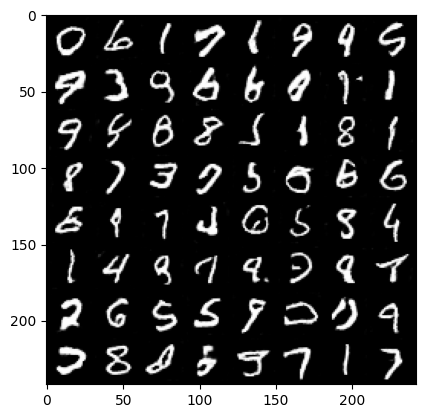

[Epoch 32/50] [D loss: 0.2053] [G loss: 2.8194]


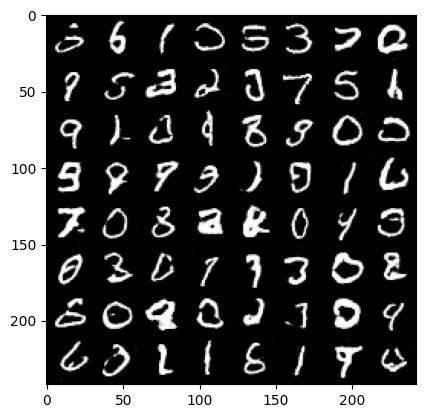

[Epoch 33/50] [D loss: 0.1982] [G loss: 2.8611]


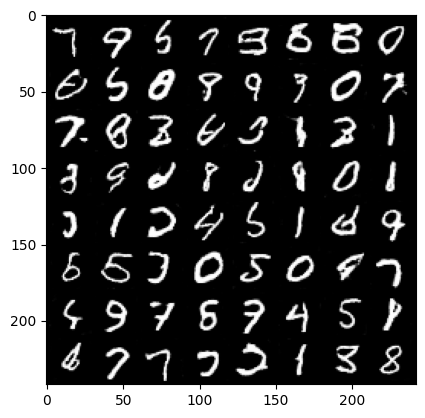

[Epoch 34/50] [D loss: 0.2044] [G loss: 2.8645]


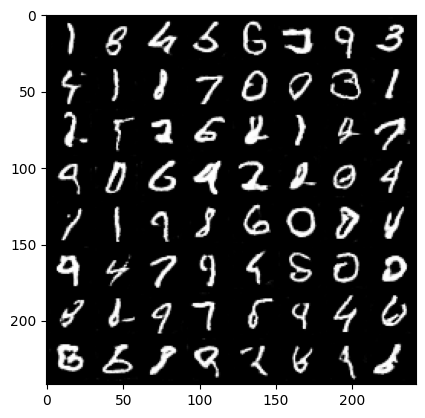

[Epoch 35/50] [D loss: 0.2020] [G loss: 2.8797]


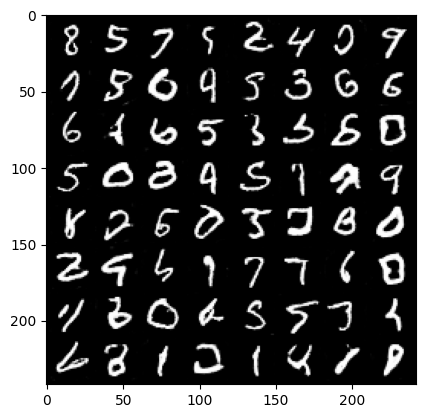

[Epoch 36/50] [D loss: 0.1970] [G loss: 2.9028]


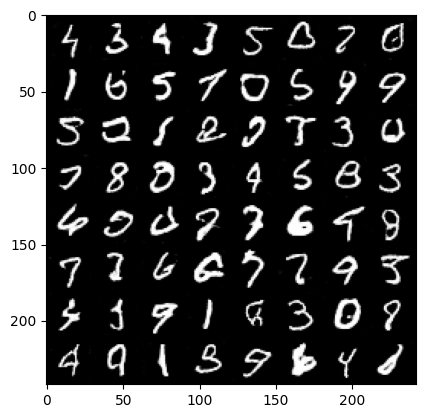

[Epoch 37/50] [D loss: 0.1970] [G loss: 2.9277]


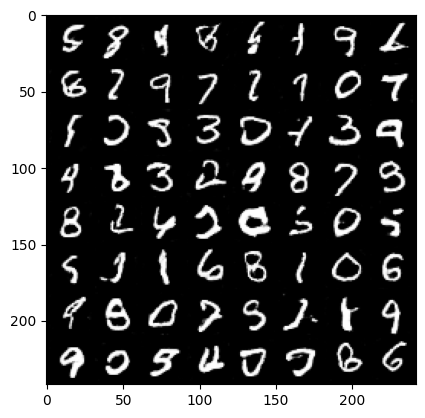

[Epoch 38/50] [D loss: 0.2003] [G loss: 2.9319]


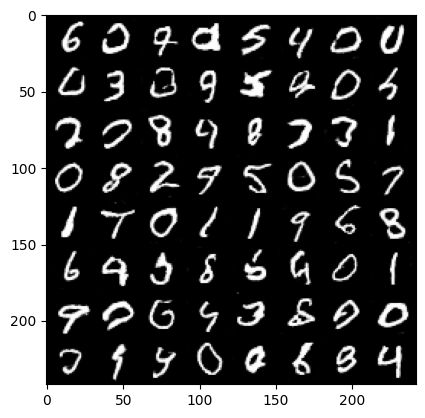

[Epoch 39/50] [D loss: 0.1934] [G loss: 2.9594]


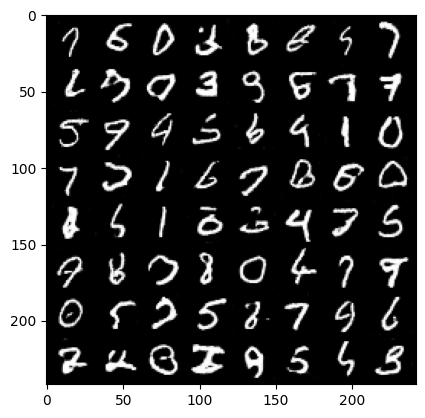

[Epoch 40/50] [D loss: 0.1950] [G loss: 2.9587]


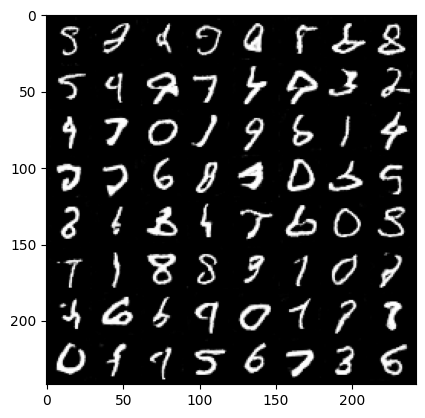

[Epoch 41/50] [D loss: 0.1906] [G loss: 2.9812]


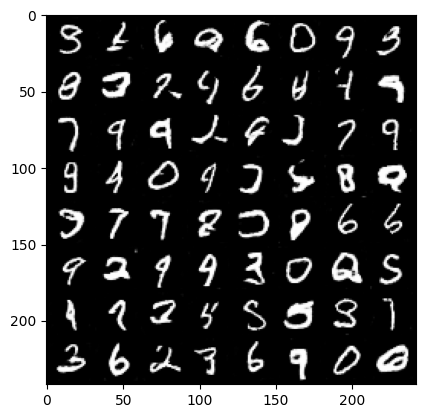

[Epoch 42/50] [D loss: 0.2029] [G loss: 2.9705]


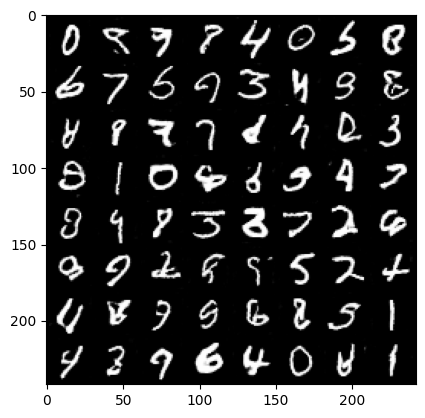

[Epoch 43/50] [D loss: 0.1883] [G loss: 2.9949]


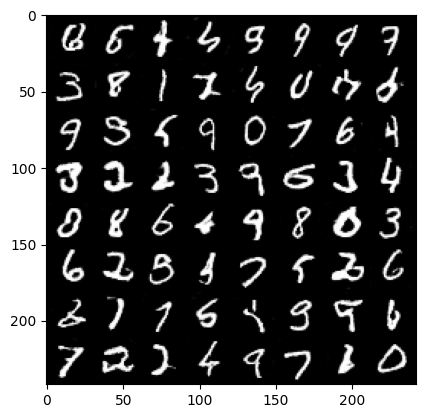

[Epoch 44/50] [D loss: 0.1955] [G loss: 3.0128]


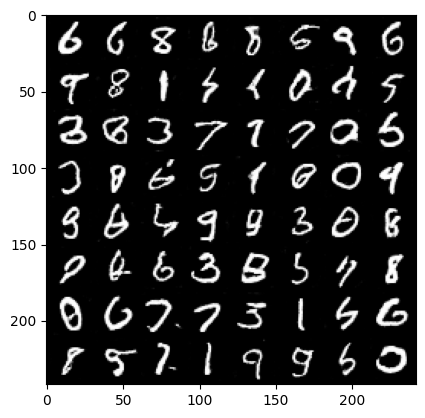

[Epoch 45/50] [D loss: 0.1960] [G loss: 3.0007]


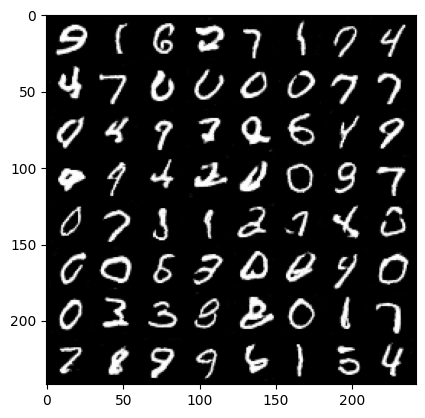

[Epoch 46/50] [D loss: 0.1930] [G loss: 3.0453]


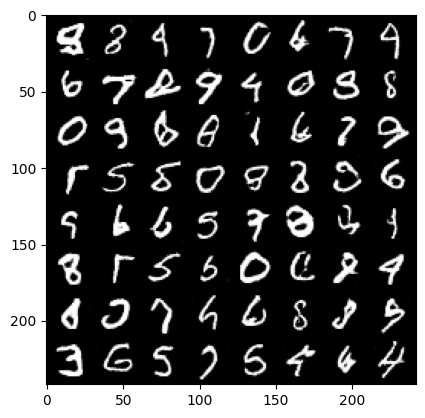

[Epoch 47/50] [D loss: 0.1900] [G loss: 3.0477]


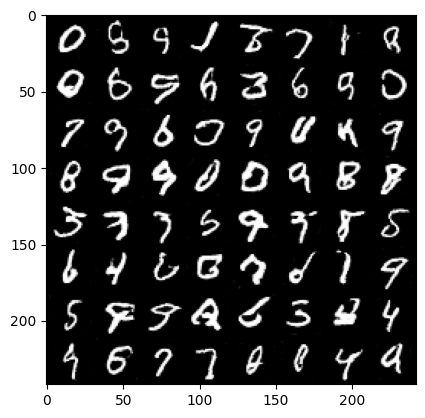

[Epoch 48/50] [D loss: 0.1973] [G loss: 3.0198]


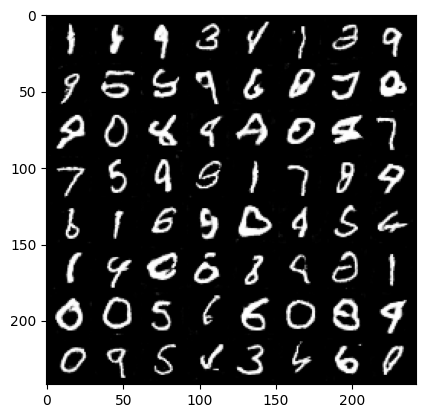

[Epoch 49/50] [D loss: 0.1839] [G loss: 3.0711]


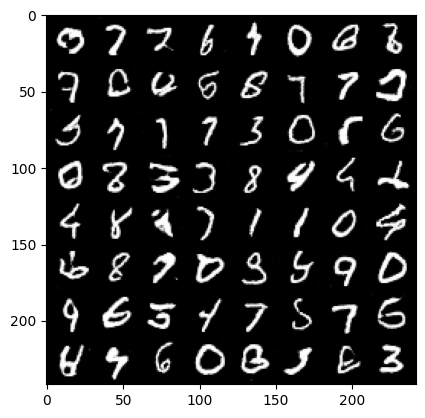

[Epoch 50/50] [D loss: 0.2015] [G loss: 3.0267]


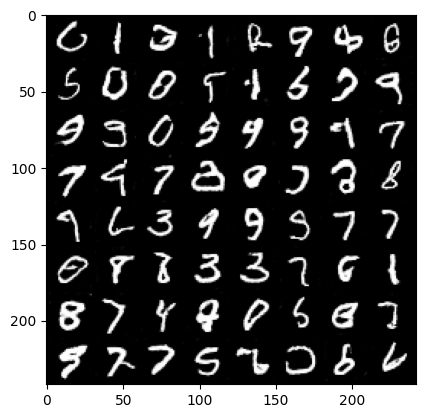

In [4]:
# Instantiate the models and move to cuda:1
generator = Generator(latent_dim).to(device)
discriminator = Discriminator().to(device)

# Loss and optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=learning_rate, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=learning_rate, betas=(0.5, 0.999))

# Training loop
for epoch in range(num_epochs):
    g_loss_epoch = 0
    d_loss_epoch = 0
    for i, (imgs, _) in enumerate(trainloader):
        
        batch_size = imgs.size(0)
        imgs = imgs.to(device)  # Move images to cuda:1
        
        # Labels for real and fake data
        valid = torch.ones(batch_size, 1, device=device)
        fake = torch.zeros(batch_size, 1, device=device)

        # Train Generator
        optimizer_G.zero_grad()
        
        z = torch.randn(batch_size, latent_dim, device=device)
        gen_imgs = generator(z)
        g_loss = criterion(discriminator(gen_imgs), valid)
        
        g_loss.backward()
        optimizer_G.step()

        # Train Discriminator
        optimizer_D.zero_grad()
        
        real_loss = criterion(discriminator(imgs), valid)
        fake_loss = criterion(discriminator(gen_imgs.detach()), fake)
        d_loss = (real_loss + fake_loss) / 2
        
        d_loss.backward()
        optimizer_D.step()
        
        # Accumulate the losses for the epoch
        g_loss_epoch += g_loss.item()
        d_loss_epoch += d_loss.item()

    # Print the average losses after each epoch
    print(f"[Epoch {epoch+1}/{num_epochs}] [D loss: {d_loss_epoch/len(trainloader):.4f}] [G loss: {g_loss_epoch/len(trainloader):.4f}]")

    # Save some generated images after each epoch
    with torch.no_grad():
        test_z = torch.randn(64, latent_dim, device=device)
        test_gen_imgs = generator(test_z)
        grid_img = torchvision.utils.make_grid(test_gen_imgs, nrow=8, normalize=True)
        plt.imshow(grid_img.permute(1, 2, 0).cpu().numpy())
        plt.show()

In [5]:
# Function to generate and display images based on input number
def generate_and_display_images(generator, num_images):
    if num_images < 1 or num_images > 10:
        raise ValueError("num_images must be a positive integer in the range 1 to 10.")
    
    with torch.no_grad():
        z = torch.randn(num_images * num_images, latent_dim, device=device)
        gen_imgs = generator(z)
        grid_img = torchvision.utils.make_grid(gen_imgs, nrow=num_images, normalize=True)
        plt.figure(figsize=(num_images, num_images))
        plt.imshow(grid_img.permute(1, 2, 0).cpu().numpy())
        plt.axis('off')
        plt.show()

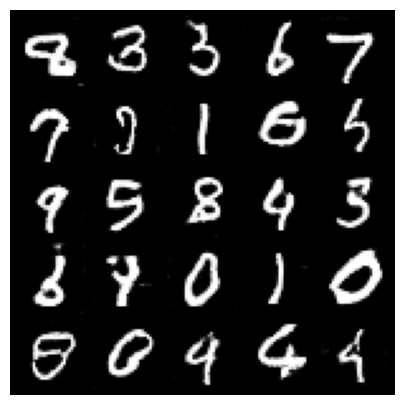

In [6]:
# Example usage: generate and display a grid of 5x5 images
generate_and_display_images(generator, 5)